# Sentiment Analysis. Unsupervised models

Now in this section, we will conduct sentiment analysis on our movies reviews. We will do analysis using different sentiment techniques based on unsupervised models since we wont use the sentiment rating generated by us.

## Lexicon-Based Approaches. Multi-Sentiment Classiﬁcation

## Sentiment Analysis with TextBlob

In [88]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
from datetime import date
import matplotlib.pyplot as plt

# Reading
Avengers_reviews = pd.read_csv("combined_datasets_cleaned_final.csv")

In [89]:
from textblob import TextBlob

# Check the sentiment using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Aply to the dataset
Avengers_reviews['sentiment_TB'] = Avengers_reviews['content_cleaned'].apply(lambda x: analyze_sentiment(x))

# Lets see the results
Avengers_reviews


,movie,review_title,date,content,rating,content_cleaned,bi_sentiment_rating,sentiment_TB
0,Avengers 2012,One word,2019-04-24,"""Perfect"" is the only thing I can say. Could n...",10.0,perfect thing say could imagine better ending,positive,0.750000
1,Avengers 2012,You intention recall an probability in imitati...,2020-07-10,You intention recall an probability in imitati...,10.0,intention recall probability imitation conscio...,positive,-0.016667
2,Avengers 2012,A perfect send off,2019-05-25,A perfect send off,10.0,perfect send,positive,1.000000
3,Avengers 2012,NAILED IT,2019-04-24,NAILED IT,10.0,nailed,positive,0.000000
4,Avengers 2012,Beautiful Symmetry,2019-04-29,"While no rabid Marvel comic book fan, I can sa...",10.0,rabid marvel comic book fan say enjoyed avenge...,positive,0.214236
...,...,...,...,...,...,...,...,...
5575,Avengers: Endgame,Least favorite of the 4 avengers films.,2019-04-29,Least favorite of the 4 avengers films.,6.0,least favorite avenger film,positive,0.100000
5576,Avengers: Endgame,Meh?,2019-04-26,Meh?,7.0,meh,positive,0.000000
5577,Avengers: Endgame,Avengers: Endgame! I love you 3000! This movie...,2019-05-09,Avengers: Endgame! I love you 3000! This movie...,9.0,avenger endgame love movie worth watching day,positive,0.400000
5578,Avengers: Endgame,Speech less!!!!,2019-07-12,This movie is all That I wanted from a movie f...,10.0,movie wanted movie long time im still hypetrai...,positive,-0.087500


In [90]:
# Lets check the statitics of the sentiments
print("Sentiments Statitics using TextBlob:")
print(Avengers_reviews['sentiment_TB'].describe())

Sentiments Statitics using TextBlob:
count    5.580000e+03
mean     2.188346e-01
std      3.226036e-01
min     -1.000000e+00
25%      9.020562e-18
50%      1.957069e-01
75%      3.833333e-01
max      1.000000e+00
Name: sentiment_TB, dtype: float64


In [91]:
# Lets apply tags to clasify TextBlob sentiments

def classify_sentiment(polarity):
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

# Sentiment analysis
Avengers_reviews['sentiment_TB'] = Avengers_reviews['content_cleaned'].apply(lambda x: analyze_sentiment(x))
# Clasify the sentiment using the function
Avengers_reviews['sentiment_class_TB'] = Avengers_reviews['sentiment_TB'].apply(lambda x: classify_sentiment(x))

# Results
Avengers_reviews


,movie,review_title,date,content,rating,content_cleaned,bi_sentiment_rating,sentiment_TB,sentiment_class_TB
0,Avengers 2012,One word,2019-04-24,"""Perfect"" is the only thing I can say. Could n...",10.0,perfect thing say could imagine better ending,positive,0.750000,positive
1,Avengers 2012,You intention recall an probability in imitati...,2020-07-10,You intention recall an probability in imitati...,10.0,intention recall probability imitation conscio...,positive,-0.016667,negative
2,Avengers 2012,A perfect send off,2019-05-25,A perfect send off,10.0,perfect send,positive,1.000000,positive
3,Avengers 2012,NAILED IT,2019-04-24,NAILED IT,10.0,nailed,positive,0.000000,neutral
4,Avengers 2012,Beautiful Symmetry,2019-04-29,"While no rabid Marvel comic book fan, I can sa...",10.0,rabid marvel comic book fan say enjoyed avenge...,positive,0.214236,positive
...,...,...,...,...,...,...,...,...,...
5575,Avengers: Endgame,Least favorite of the 4 avengers films.,2019-04-29,Least favorite of the 4 avengers films.,6.0,least favorite avenger film,positive,0.100000,positive
5576,Avengers: Endgame,Meh?,2019-04-26,Meh?,7.0,meh,positive,0.000000,neutral
5577,Avengers: Endgame,Avengers: Endgame! I love you 3000! This movie...,2019-05-09,Avengers: Endgame! I love you 3000! This movie...,9.0,avenger endgame love movie worth watching day,positive,0.400000,positive
5578,Avengers: Endgame,Speech less!!!!,2019-07-12,This movie is all That I wanted from a movie f...,10.0,movie wanted movie long time im still hypetrai...,positive,-0.087500,negative


In [92]:
# Lets see again the statitics
print("Sentiments:")
sentiment_counts_TB = Avengers_reviews['sentiment_class_TB'].value_counts()
sentiment_counts_TB

Sentiments:


positive    4187
negative     717
neutral      676
Name: sentiment_class_TB, dtype: int64

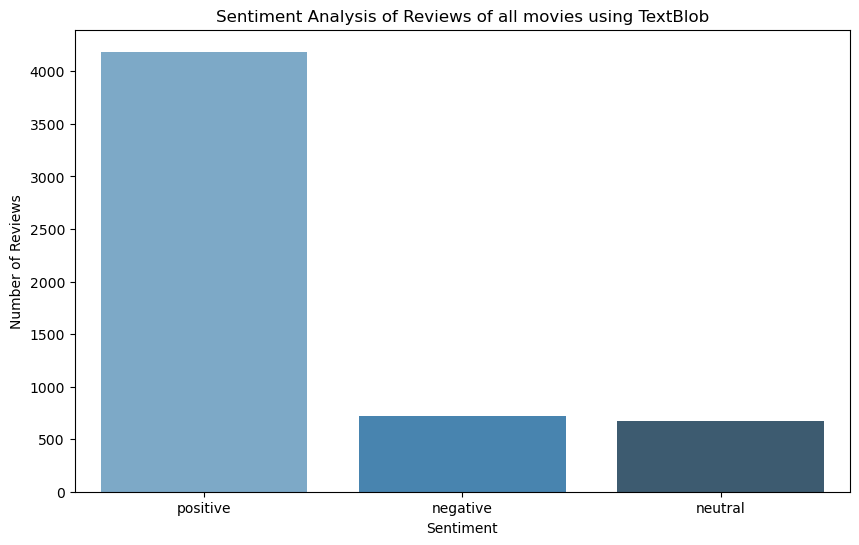

In [93]:
# Graphic
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts_TB.index, y=sentiment_counts_TB.values, palette='Blues_d')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis of Reviews of all movies using TextBlob')
plt.show()



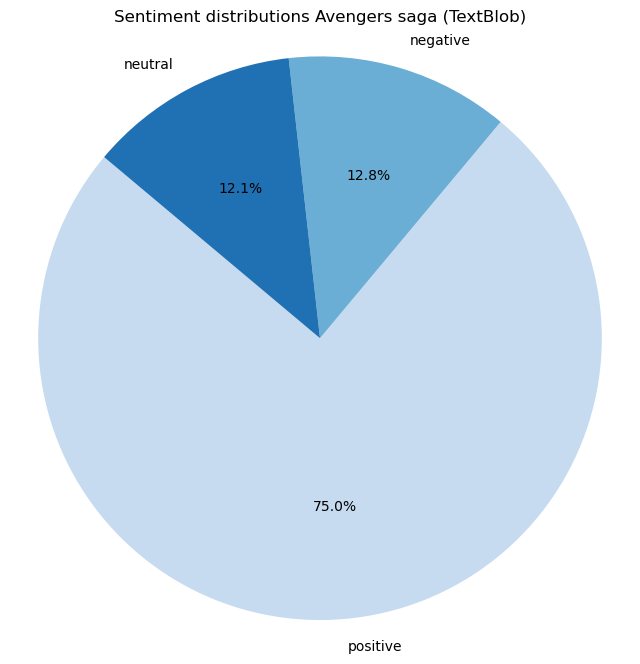

In [94]:
colors = sns.color_palette("Blues", len(sentiment_counts_TB))
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts_TB, labels=sentiment_counts_TB.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment distributions Avengers saga (TextBlob)')
plt.axis('equal') 
plt.show()

In [95]:
# Now lets create a pivot table to count reviews by rating and sentiment
sentiment_counts_stacked_TB = Avengers_reviews.pivot_table(index='rating', columns='sentiment_class_TB', aggfunc='size', fill_value=0)

# Print
print("Sentiment by rating of all movies:")
sentiment_counts_stacked_TB

Sentiment by rating of all movies:


sentiment_class_TB,negative,neutral,positive
rating,,,
1.0,119,48,98
2.0,45,24,42
3.0,57,17,53
4.0,46,21,57
5.0,40,17,93
6.0,113,74,330
7.0,80,74,495
8.0,51,86,490
9.0,34,74,648


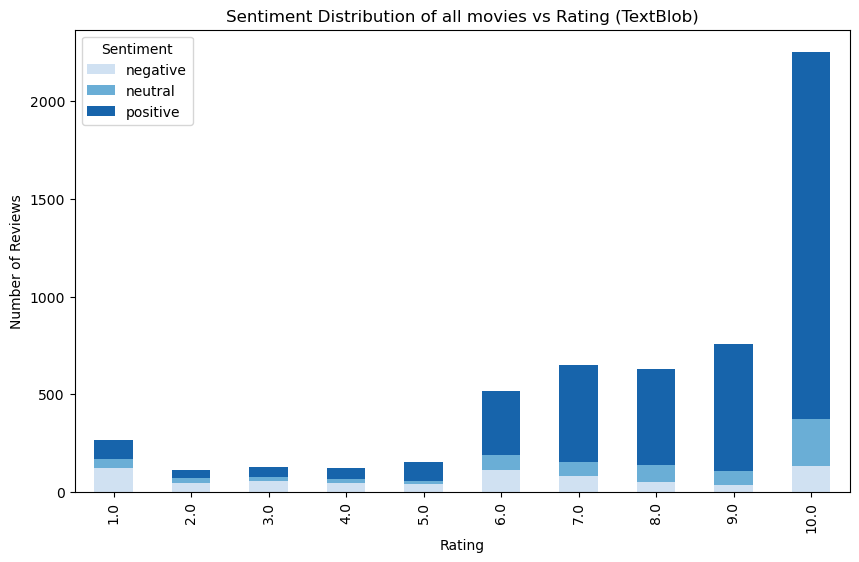

In [96]:
# Graphic
sentiment_counts_stacked_TB.plot(kind='bar', stacked=True, color= plt.cm.Blues([0.2, 0.5, 0.8]), figsize=(10, 6))

plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution of all movies vs Rating (TextBlob)')
plt.legend(title='Sentiment')
plt.show()


In [97]:
sentiment_counts_stacked_TB = Avengers_reviews.groupby(['movie', 'rating', 'sentiment_class_TB']).size().unstack(fill_value=0)
sentiment_counts_stacked_TB 

sentiment_class_TB              negative  neutral  positive
movie                   rating                             
Avengers 2012           1.0           30       11        27
                        2.0           12        4        10
                        3.0           18        4        14
                        4.0            9        5         7
                        5.0            1        0         4
                        6.0           36       23        86
                        7.0           20       19        99
                        8.0           13       13        82
                        9.0            6       11       132
                        10.0          41       81       577
Avengers: Age of Ultron 1.0           26       16        21
                        2.0           12        9        14
                        3.0           10        4        19
                        4.0           20        7        32
                        5.0           25       16        73
                        6.0           29       21       124
                        7.0           27       27       226
                        8.0           18       37       212
                        9.0            6       26       168
                        10.0           3       18       149
Avengers: Endgame       1.0           30       11        27
                        2.0           12        4        10
                        3.0           18        4        14
                        4.0            9        5         7
                        5.0            1        0         4
                        6.0           36       23        86
                        7.0           20       19        99
                        8.0           13       13        82
                        9.0            6       11       132
                        10.0          41       81       577
Avengers: Infinity War  1.0           33       10        23
                        2.0            9        7         8
                        3.0           11        5         6
                        4.0            8        4        11
                        5.0           13        1        12
                        6.0           12        7        34
                        7.0           13        9        71
                        8.0            7       23       114
                        9.0           16       26       216
                        10.0          47       61       578

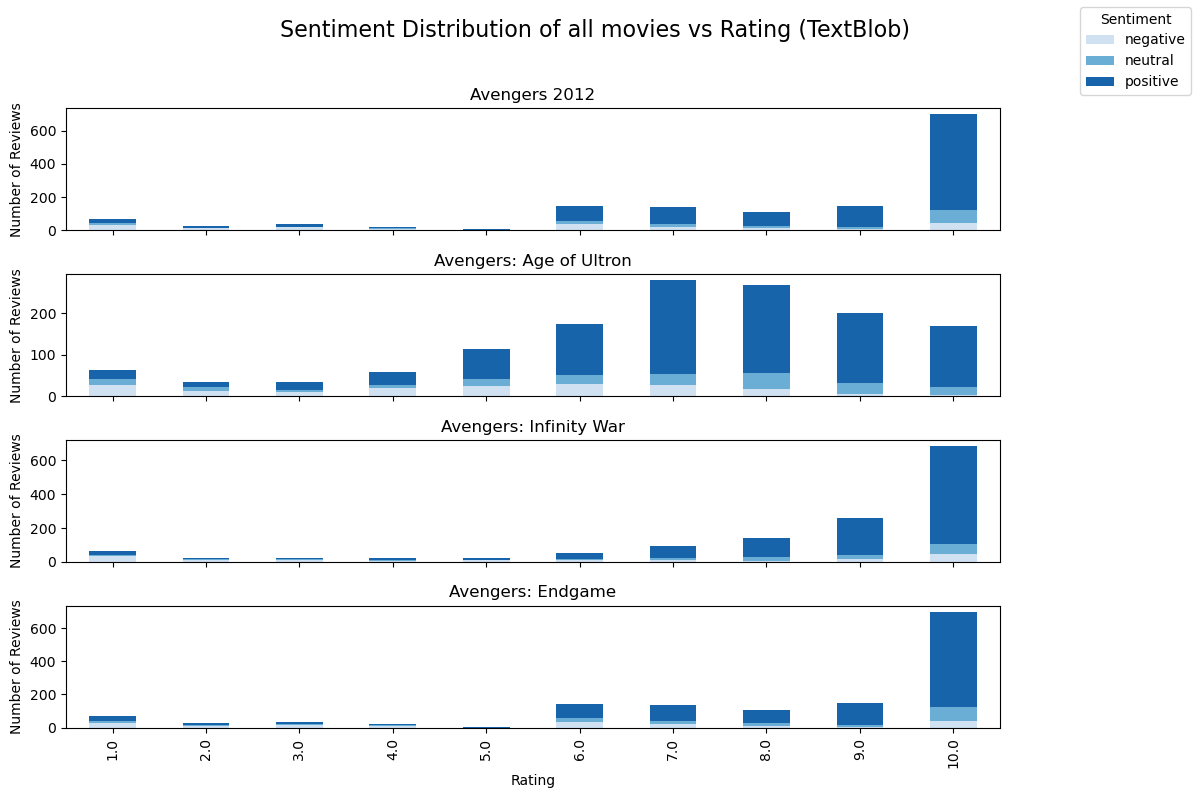

In [98]:
# subplots
movies = Avengers_reviews['movie'].unique()
fig, axes = plt.subplots(nrows=len(movies), ncols=1, figsize=(12, 8), sharex=True)

# Colors
colors = plt.cm.Blues([0.2, 0.5, 0.8])
for ax, movie in zip(axes, movies):
    sentiment_counts_stacked_TB.loc[movie].plot(kind='bar', stacked=True, color=colors, ax=ax, legend=False)
    ax.set_title(movie)
    ax.set_xlabel('Rating')
    ax.set_ylabel('Number of Reviews')

fig.suptitle('Sentiment Distribution of all movies vs Rating (TextBlob)', fontsize=16)
if len(movies) > 0:
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, title='Sentiment', loc='upper right')
plt.tight_layout(rect=[0, 0, 0.85, 0.96])
plt.show()

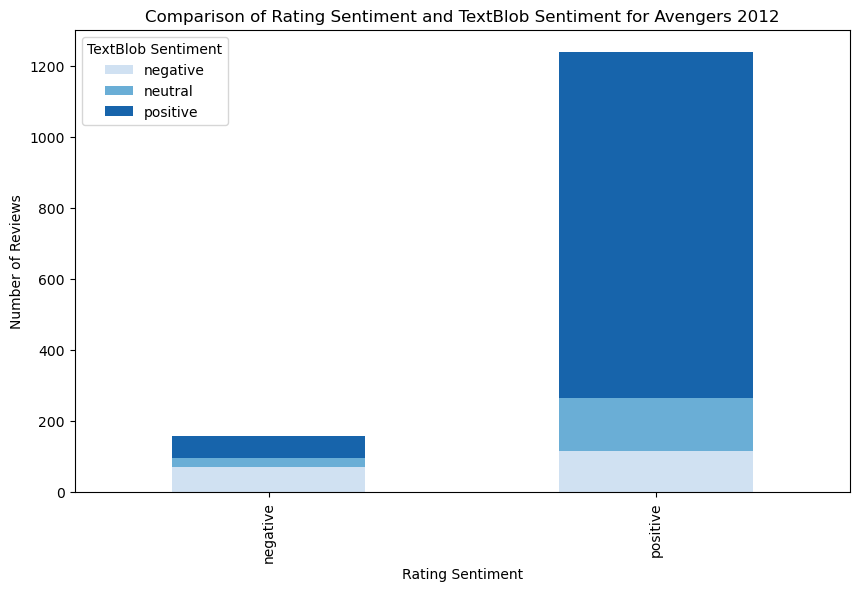

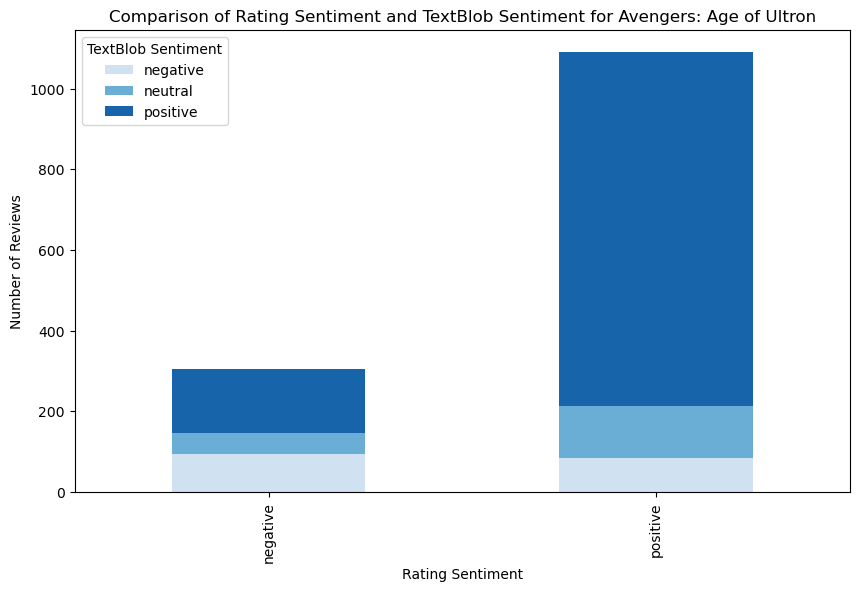

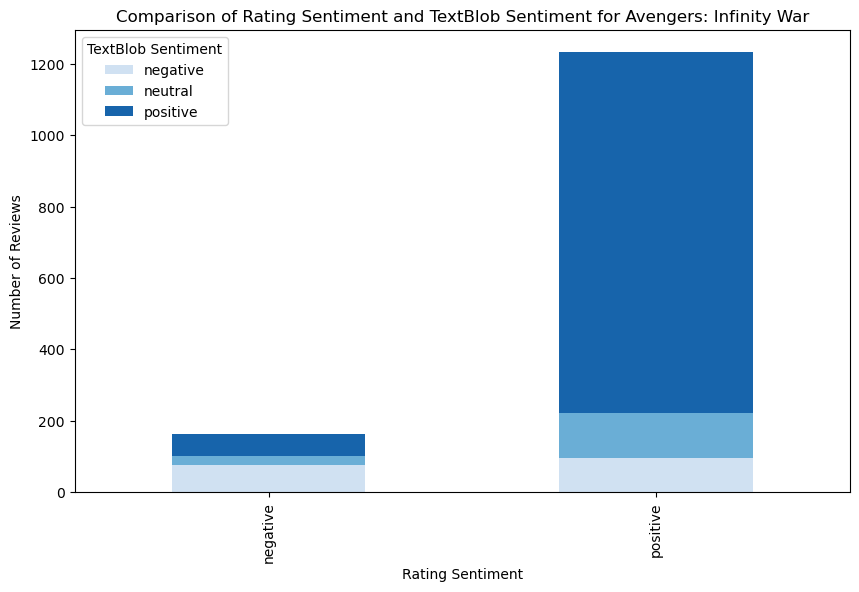

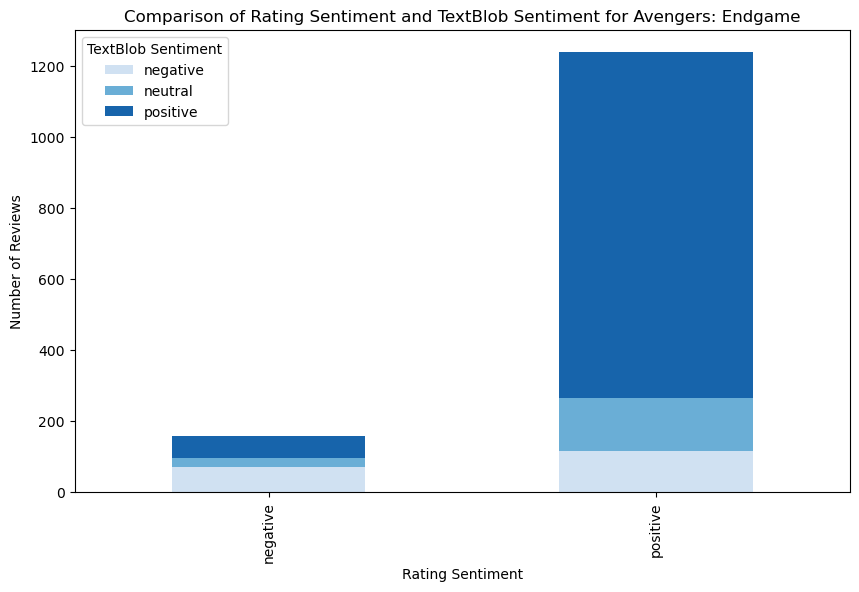

In [99]:
# Get the unique movie names
movies = Avengers_reviews['movie'].unique()

# Loop through each movie and create the comparison table and plot
for movie in movies:
    # Filter the reviews for the current movie
    movie_reviews = Avengers_reviews[Avengers_reviews['movie'] == movie]
    
    # Create a pivot table to compare the counts
    comparison_table = movie_reviews.pivot_table(index='bi_sentiment_rating', columns='sentiment_class_TB', aggfunc='size', fill_value=0)
   
    # Plotting the comparison table as a stacked bar plot
    comparison_table.plot(kind='bar', stacked=True, color=plt.cm.Blues([0.2, 0.5, 0.8]), figsize=(10, 6))
    
    plt.xlabel('Rating Sentiment')
    plt.ylabel('Number of Reviews')
    plt.title(f'Comparison of Rating Sentiment and TextBlob Sentiment for {movie}')
    plt.legend(title='TextBlob Sentiment')
    plt.show()

Observing the previous graphic, we see that most high ratings (e.g., 9 and 10) have a significant proportion of positive sentiments except **"Avengers: Age of Ultron"** which is normal since that movie have lower ratings that the others movies. This suggests that viewers who give high ratings tend to have a positive perception of the movies and viceversa.

In the case of neutral sentiments, we see specially in **"Avengers: Age of Ultron"** that there are a higher porportion of positive ratings than neutrals, indicating that even if viewers dont give high ratings, they still like the movie, showing a greater variability that in the other movies. The other movies show a more uniform distribution of positive sentiments in mid-range ratings.

Overall, most reviews tend to lean towards positive sentiments, indicating a favorable perception of the Avengers movies among viewers. **"Avengers: Infinity war"** have the more positive reviews and positive sentiment than the other movies, which indicate that viewers prefered this one than the last installment of the ending of the saga. 

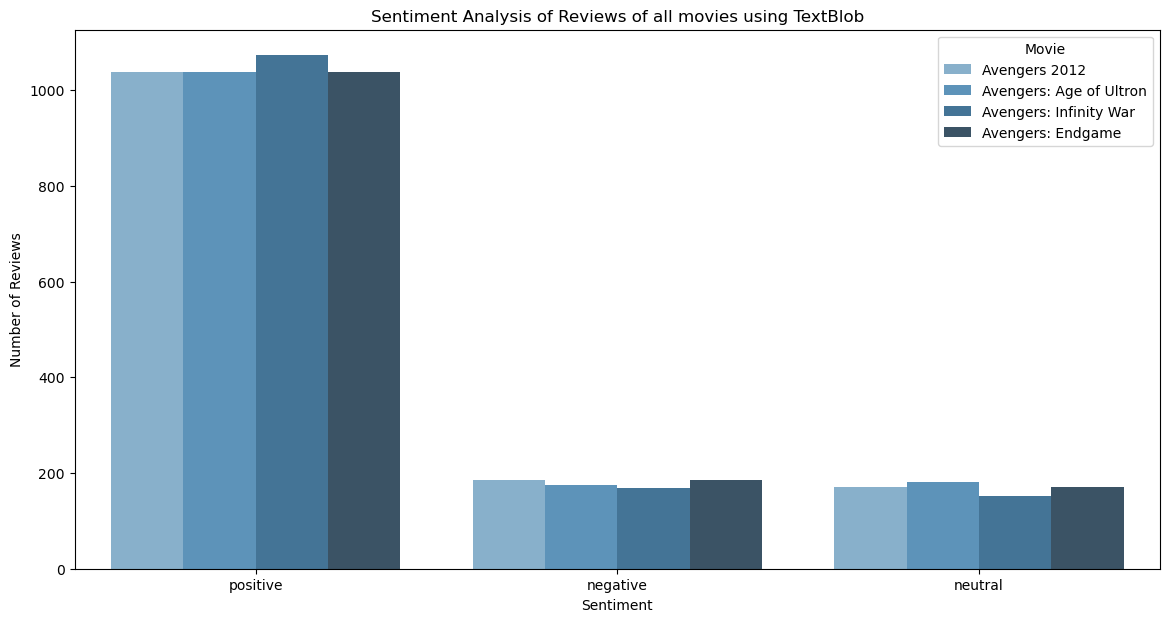

In [101]:
# Per movie
plt.figure(figsize=(14, 7))
sns.countplot(data=Avengers_reviews, x='sentiment_class_TB', hue='movie', palette='Blues_d')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis of Reviews of all movies using TextBlob')
plt.legend(title='Movie', loc='upper right')
plt.show()

Observing only the TextBlob sentiment, we see that **"Avengers: Infinity war"** have the most highest positive sentiment and the one with more negative sentiments is **"Avengers: Endgame"** which is interesting since the movie with the average lowest rating is **"Avengers: Age of Ultron"**.

In [103]:
# Function to calculate polarity and subjectivity
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to the 'content_cleaned' column
Avengers_reviews['polarity'], Avengers_reviews['subjectivity'] = zip(*Avengers_reviews['content_cleaned'].apply(analyze_sentiment))

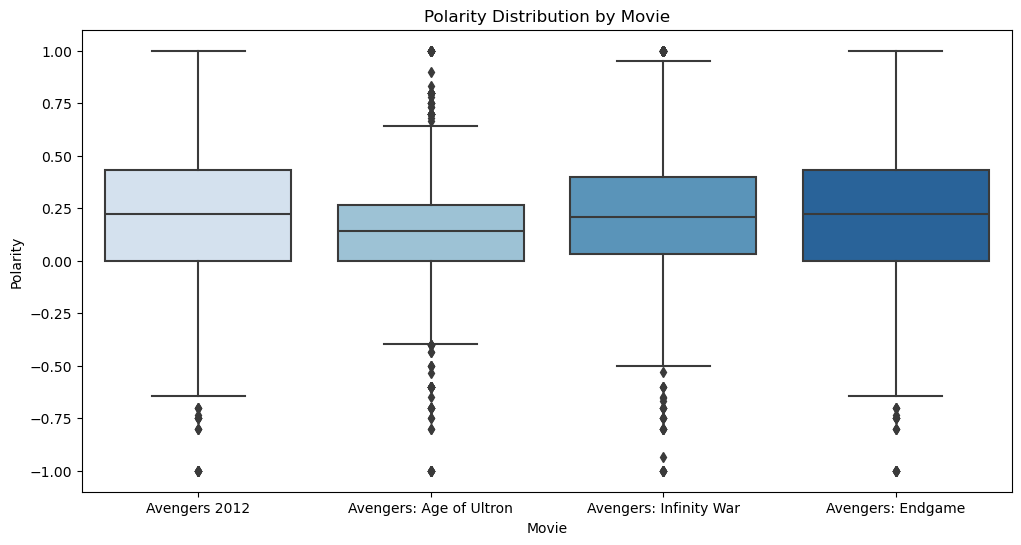

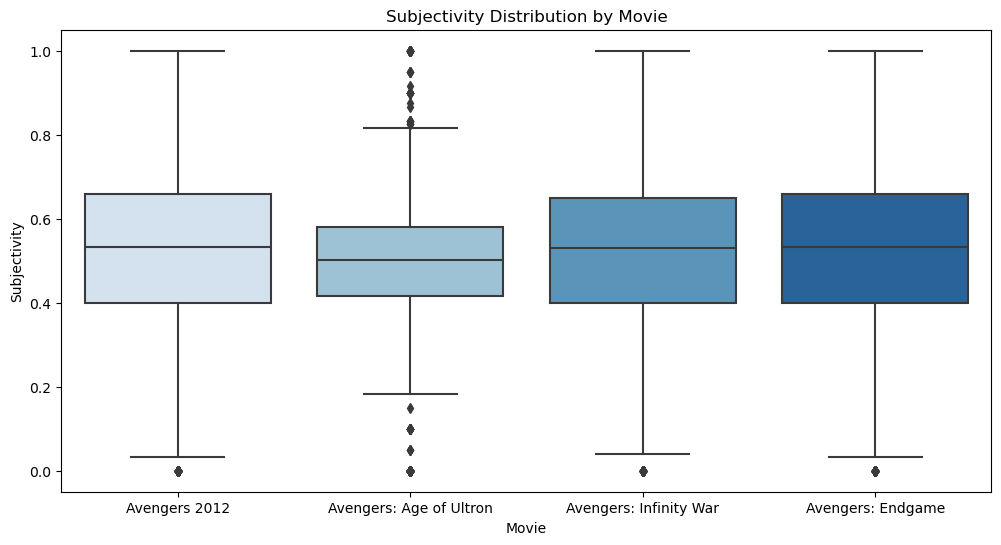

In [104]:
# Plot polarity distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='movie', y='polarity', data=Avengers_reviews, palette='Blues')
plt.title('Polarity Distribution by Movie')
plt.xlabel('Movie')
plt.ylabel('Polarity')
plt.show()

# Plot subjectivity distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='movie', y='subjectivity', data=Avengers_reviews, palette='Blues')
plt.title('Subjectivity Distribution by Movie')
plt.xlabel('Movie')
plt.ylabel('Subjectivity')
plt.show()


In [105]:
import plotly.express as px
import plotly.graph_objects as go

# Plot the polarity and subjectivity
fig = px.scatter(Avengers_reviews, 
                 x='polarity', 
                 y='subjectivity', 
                 color='sentiment_class_TB',
                 size='subjectivity',
                 symbol='movie',
                 title='Sentiment Analysis using TextBlob')

# Add a vertical line at x=0 for Neutral Reviews
fig.update_layout(shapes=[dict(type='line',
                               yref='paper', y0=0, y1=1, 
                               xref='x', x0=0, x1=0)])

# Show the figure
fig.show()

**Polarity Insights:**

- General Positive Reception: All movies have a positive median polarity, indicating overall positive reception.
- Consistent Positive Sentiment for Endgame: Avengers: Endgame shows the highest and most consistent positive polarity, suggesting it was particularly well-received by audiences.
- Varied Opinions for Age of Ultron: Avengers: Age of Ultron has a median polarity closer to neutral with a wide range, indicating mixed reviews with significant negative sentiments as well.
  
**Subjectivity Insights:**
- Opinion-Based Reviews: All movies have high median subjectivity, showing that reviews are mostly opinion-based.
- Age of Ultron’s Mixed Objectivity: Avengers: Age of Ultron shows a wider range of subjectivity, indicating some reviews are more factual while others are highly opinionated.
- Consistent Subjectivity in Endgame: Similar to polarity, Avengers: Endgame shows consistent subjectivity, indicating reviewers had strong opinions about the movie.

**Comparative Analysis:**
- Highest Positive Sentiment and Subjectivity: Avengers: Endgame leads in both positive sentiment and subjectivity, indicating strong and positive opinions. Mixed Reviews for Age of Ultron: Avengers: Age of Ultron stands out with mixed sentiments and varying subjectivity, reflecting divided opinions among the audience.

Correlation between rating and polarity: 0.40097298576370716
Correlation between rating and subjectivity: 0.07227985094018098


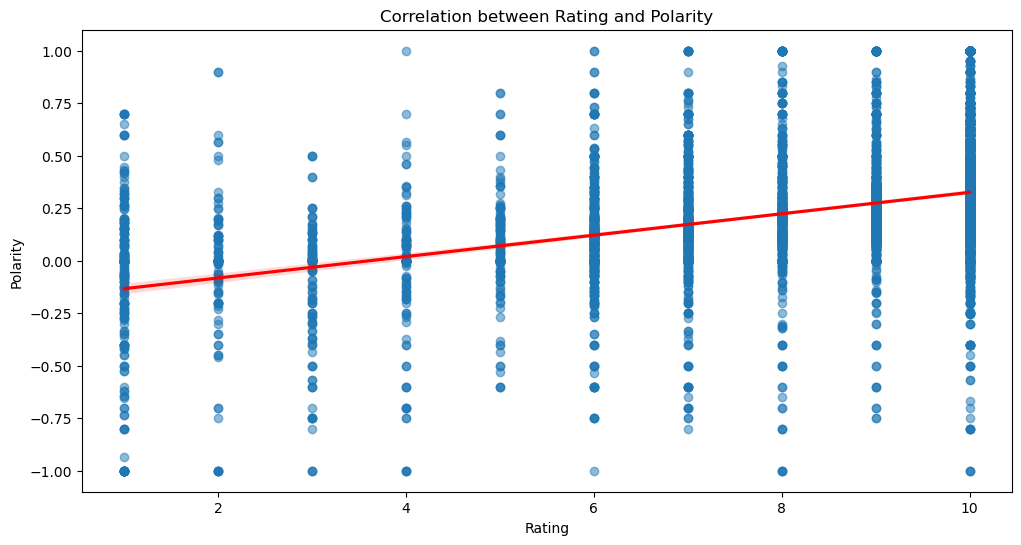

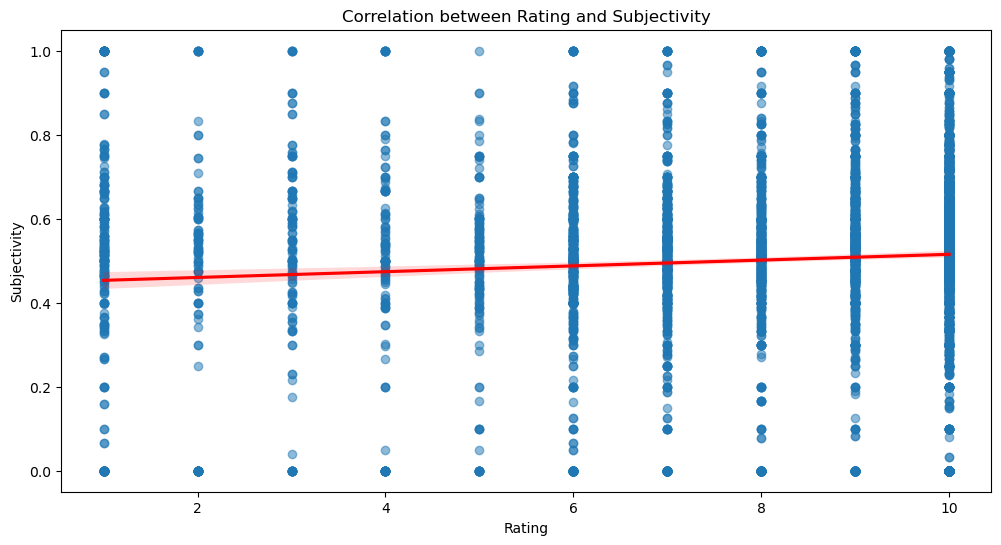

In [107]:
# Calculate correlation between rating and polarity
correlation_polarity = Avengers_reviews[['rating', 'polarity']].corr().iloc[0, 1]
print(f"Correlation between rating and polarity: {correlation_polarity}")

# Calculate correlation between rating and subjectivity
correlation_subjectivity = Avengers_reviews[['rating', 'subjectivity']].corr().iloc[0, 1]
print(f"Correlation between rating and subjectivity: {correlation_subjectivity}")

# Plot correlation between rating and polarity
plt.figure(figsize=(12, 6))
sns.regplot(x='rating', y='polarity', data=Avengers_reviews, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation between Rating and Polarity')
plt.xlabel('Rating')
plt.ylabel('Polarity')
plt.show()

# Plot correlation between rating and subjectivity
plt.figure(figsize=(12, 6))
sns.regplot(x='rating', y='subjectivity', data=Avengers_reviews, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation between Rating and Subjectivity')
plt.xlabel('Rating')
plt.ylabel('Subjectivity')
plt.show()


**Polarity Insights:**

- Higher Ratings and Positive Sentiment: The positive correlation between ratings and polarity suggests that viewers who rate the movies higher tend to express more positive sentiments in their reviews. This is consistent with the expectation that satisfied viewers are more likely to write positive reviews.
- Variability in Sentiment: The significant variability in polarity scores for each rating indicates that not all high ratings are associated with positive sentiments, and not all low ratings are associated with negative sentiments. This variability highlights the complexity of sentiment expression in reviews.

**Subjectivity Insights:**
  
- Weak Association with Ratings: The very weak positive correlation between ratings and subjectivity suggests that the level of subjectivity in reviews is not strongly influenced by the ratings. Viewers are likely to express their opinions and personal views regardless of the rating they give.
- Diverse Review Styles: The wide range of subjectivity scores for each rating indicates that reviewers have diverse styles of expressing their opinions. Some may provide factual, objective reviews, while others may share highly subjective and opinionated feedback.

## Sentiment Analysis with VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [110]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Create the analyzer from the VADER lexicon
sia = SentimentIntensityAnalyzer()

# Define the function to analyze the sentiment with VADER
def analyze_sentiment_vader(text):
    score = sia.polarity_scores(text)
    return score['compound']

# Lets apply the analysis to 'content_cleaned'
Avengers_reviews['sentiment_vader'] = Avengers_reviews['content_cleaned'].apply(lambda x: analyze_sentiment_vader(x))

# Results
Avengers_reviews

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dayan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,movie,review_title,date,content,rating,content_cleaned,bi_sentiment_rating,sentiment_TB,sentiment_class_TB,polarity,subjectivity,sentiment_vader
0,Avengers 2012,One word,2019-04-24,"""Perfect"" is the only thing I can say. Could n...",10.0,perfect thing say could imagine better ending,positive,0.750000,positive,0.750000,0.750000,0.7650
1,Avengers 2012,You intention recall an probability in imitati...,2020-07-10,You intention recall an probability in imitati...,10.0,intention recall probability imitation conscio...,positive,-0.016667,negative,-0.016667,0.250000,0.0000
2,Avengers 2012,A perfect send off,2019-05-25,A perfect send off,10.0,perfect send,positive,1.000000,positive,1.000000,1.000000,0.5719
3,Avengers 2012,NAILED IT,2019-04-24,NAILED IT,10.0,nailed,positive,0.000000,neutral,0.000000,0.000000,0.0000
4,Avengers 2012,Beautiful Symmetry,2019-04-29,"While no rabid Marvel comic book fan, I can sa...",10.0,rabid marvel comic book fan say enjoyed avenge...,positive,0.214236,positive,0.214236,0.490972,0.9869
...,...,...,...,...,...,...,...,...,...,...,...,...
5575,Avengers: Endgame,Least favorite of the 4 avengers films.,2019-04-29,Least favorite of the 4 avengers films.,6.0,least favorite avenger film,positive,0.100000,positive,0.100000,0.700000,-0.3570
5576,Avengers: Endgame,Meh?,2019-04-26,Meh?,7.0,meh,positive,0.000000,neutral,0.000000,0.000000,-0.0772
5577,Avengers: Endgame,Avengers: Endgame! I love you 3000! This movie...,2019-05-09,Avengers: Endgame! I love you 3000! This movie...,9.0,avenger endgame love movie worth watching day,positive,0.400000,positive,0.400000,0.350000,0.7269
5578,Avengers: Endgame,Speech less!!!!,2019-07-12,This movie is all That I wanted from a movie f...,10.0,movie wanted movie long time im still hypetrai...,positive,-0.087500,negative,-0.087500,0.402083,0.3818


### Sentiments classification:
Since the compound score ranges from -1 (most extreme negative) to +1 (most extreme positive) we will classify the sentiments like this:

- Positive: Compound score > 0.05
- Neutral: Compound score between -0.05 and 0.05 (inclusive)
- Negative: Compound score < -0.05

In [112]:
# Function to classify the sentiments using VADER
def classify_sentiment_vader(compound):
    if compound > 0.05:
        return "positive"
    elif compound < -0.05:
        return "negative"
    else:
        return "neutral"

# Apply the function to 'content_cleaned'
Avengers_reviews['sentiment_vader'] = Avengers_reviews['content_cleaned'].apply(lambda x: analyze_sentiment_vader(x))
# Classify the sentiment
Avengers_reviews['sentiment_class_vader'] = Avengers_reviews['sentiment_vader'].apply(lambda x: classify_sentiment_vader(x))

# Results
Avengers_reviews

,movie,review_title,date,content,rating,content_cleaned,bi_sentiment_rating,sentiment_TB,sentiment_class_TB,polarity,subjectivity,sentiment_vader,sentiment_class_vader
0,Avengers 2012,One word,2019-04-24,"""Perfect"" is the only thing I can say. Could n...",10.0,perfect thing say could imagine better ending,positive,0.750000,positive,0.750000,0.750000,0.7650,positive
1,Avengers 2012,You intention recall an probability in imitati...,2020-07-10,You intention recall an probability in imitati...,10.0,intention recall probability imitation conscio...,positive,-0.016667,negative,-0.016667,0.250000,0.0000,neutral
2,Avengers 2012,A perfect send off,2019-05-25,A perfect send off,10.0,perfect send,positive,1.000000,positive,1.000000,1.000000,0.5719,positive
3,Avengers 2012,NAILED IT,2019-04-24,NAILED IT,10.0,nailed,positive,0.000000,neutral,0.000000,0.000000,0.0000,neutral
4,Avengers 2012,Beautiful Symmetry,2019-04-29,"While no rabid Marvel comic book fan, I can sa...",10.0,rabid marvel comic book fan say enjoyed avenge...,positive,0.214236,positive,0.214236,0.490972,0.9869,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,Avengers: Endgame,Least favorite of the 4 avengers films.,2019-04-29,Least favorite of the 4 avengers films.,6.0,least favorite avenger film,positive,0.100000,positive,0.100000,0.700000,-0.3570,negative
5576,Avengers: Endgame,Meh?,2019-04-26,Meh?,7.0,meh,positive,0.000000,neutral,0.000000,0.000000,-0.0772,negative
5577,Avengers: Endgame,Avengers: Endgame! I love you 3000! This movie...,2019-05-09,Avengers: Endgame! I love you 3000! This movie...,9.0,avenger endgame love movie worth watching day,positive,0.400000,positive,0.400000,0.350000,0.7269,positive
5578,Avengers: Endgame,Speech less!!!!,2019-07-12,This movie is all That I wanted from a movie f...,10.0,movie wanted movie long time im still hypetrai...,positive,-0.087500,negative,-0.087500,0.402083,0.3818,positive


In [113]:
# Check the statistics of all movies
sentiment_counts_vader = Avengers_reviews['sentiment_class_vader'].value_counts()
sentiment_counts_vader 

positive    4167
negative     841
neutral      572
Name: sentiment_class_vader, dtype: int64

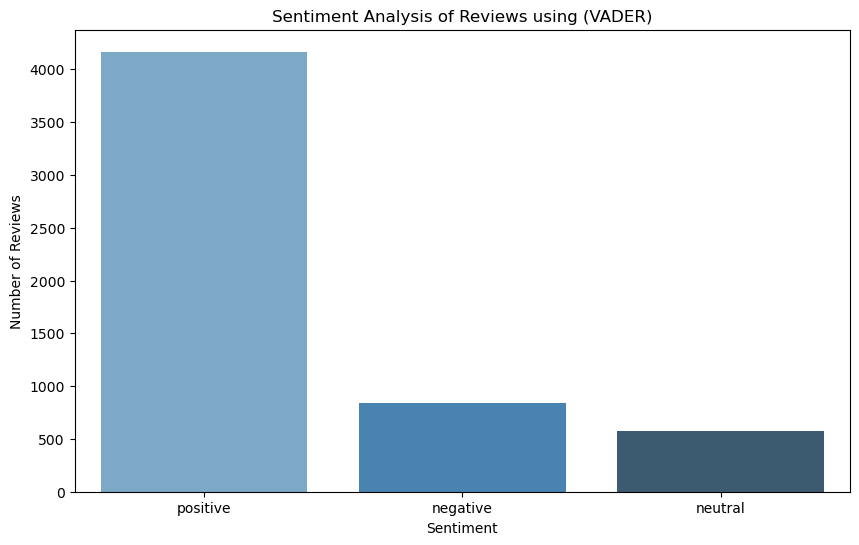

In [114]:
# Graphic
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts_vader.index, y=sentiment_counts_vader.values, palette='Blues_d')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis of Reviews using (VADER)')
plt.show()

In [115]:
# Now lets create a pivot table to count reviews by rating and sentiment
sentiment_counts_stacked_Vader = Avengers_reviews.pivot_table(index='rating', columns='sentiment_class_vader', aggfunc='size', fill_value=0)

# Print
print("Sentiment using Vader by rating:")
sentiment_counts_stacked_Vader

Sentiment using Vader by rating:


sentiment_class_vader,negative,neutral,positive
rating,,,
1.0,109,39,117
2.0,52,13,46
3.0,64,14,49
4.0,51,18,55
5.0,44,13,93
6.0,123,73,321
7.0,90,73,486
8.0,77,73,477
9.0,59,66,631


<Figure size 1000x600 with 0 Axes>

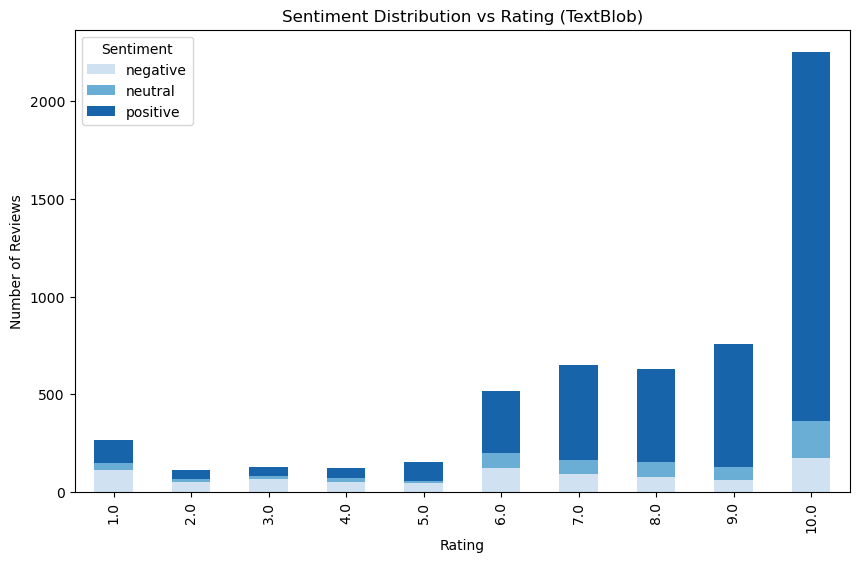

In [116]:
# Now we are going to graphic the ratings and sentiment_class_vader

plt.figure(figsize=(10, 6))
sentiment_counts_stacked_Vader.plot(kind='bar', stacked=True, color= plt.cm.Blues([0.2, 0.5, 0.8]), figsize=(10, 6))

plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution vs Rating (TextBlob)')
plt.legend(title='Sentiment')
plt.show()


In [117]:
sentiment_counts_stacked_vader = Avengers_reviews.groupby(['movie', 'rating', 'sentiment_class_vader']).size().unstack(fill_value=0)
sentiment_counts_stacked_vader

sentiment_class_vader           negative  neutral  positive
movie                   rating                             
Avengers 2012           1.0           25       10        33
                        2.0           13        1        12
                        3.0           20        2        14
                        4.0           10        3         8
                        5.0            2        0         3
                        6.0           37       21        87
                        7.0           22       15       101
                        8.0           15       12        81
                        9.0           11       13       125
                        10.0          50       64       585
Avengers: Age of Ultron 1.0           29       12        22
                        2.0           16        7        12
                        3.0           11        6        16
                        4.0           23        7        29
                        5.0           31       12        71
                        6.0           36       24       114
                        7.0           29       32       219
                        8.0           26       33       208
                        9.0           11       17       172
                        10.0           5       14       151
Avengers: Endgame       1.0           25       10        33
                        2.0           13        1        12
                        3.0           20        2        14
                        4.0           10        3         8
                        5.0            2        0         3
                        6.0           37       21        87
                        7.0           22       15       101
                        8.0           15       12        81
                        9.0           11       13       125
                        10.0          50       64       585
Avengers: Infinity War  1.0           30        7        29
                        2.0           10        4        10
                        3.0           13        4         5
                        4.0            8        5        10
                        5.0            9        1        16
                        6.0           13        7        33
                        7.0           17       11        65
                        8.0           21       16       107
                        9.0           26       23       209
                        10.0          67       48       571

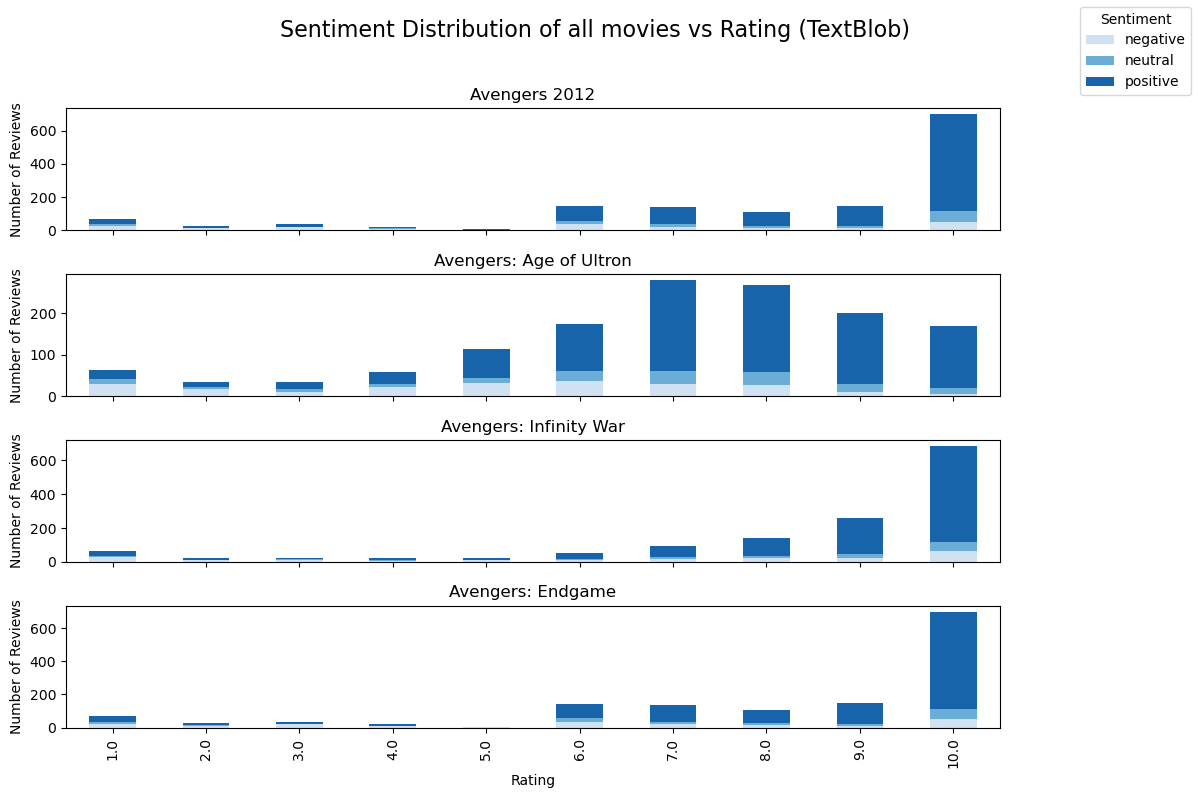

In [118]:
# subplots
movies = Avengers_reviews['movie'].unique()
fig, axes = plt.subplots(nrows=len(movies), ncols=1, figsize=(12, 8), sharex=True)

# Colors
colors = plt.cm.Blues([0.2, 0.5, 0.8])
for ax, movie in zip(axes, movies):
    sentiment_counts_stacked_vader.loc[movie].plot(kind='bar', stacked=True, color=colors, ax=ax, legend=False)
    ax.set_title(movie)
    ax.set_xlabel('Rating')
    ax.set_ylabel('Number of Reviews')

fig.suptitle('Sentiment Distribution of all movies vs Rating (TextBlob)', fontsize=16)
if len(movies) > 0:
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, title='Sentiment', loc='upper right')
plt.tight_layout(rect=[0, 0, 0.85, 0.96])
plt.show()

# Temporal Trend Analysis
Lets observe how the sentiment change across time in each sentiment.

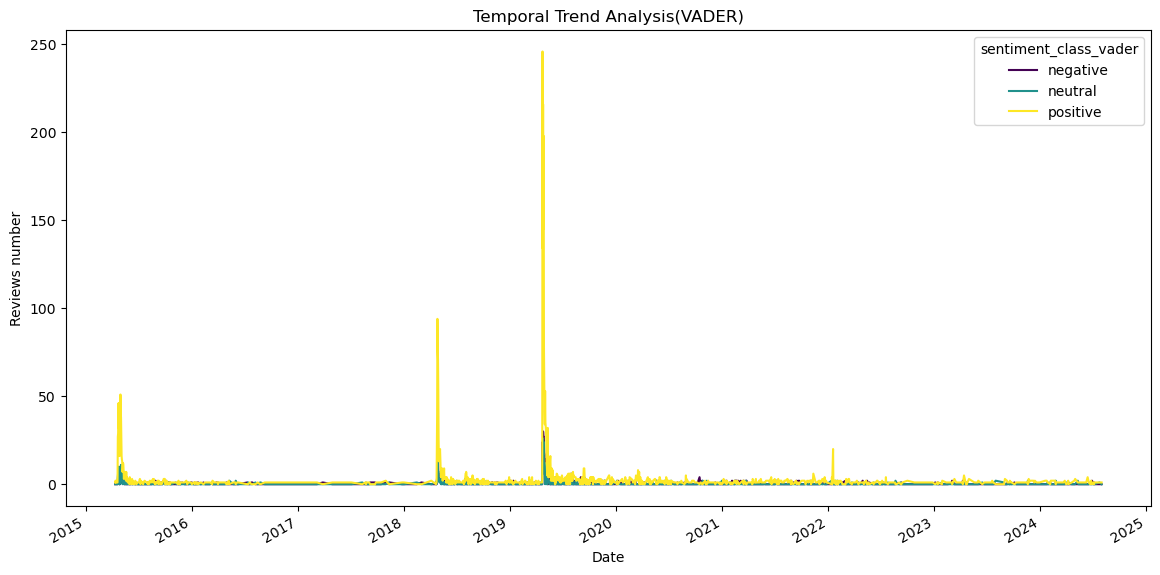

In [120]:
# Group by year and month. Vader sentiment
Avengers_reviews['date'] = pd.to_datetime(Avengers_reviews['date'])
sentiment_trends = Avengers_reviews.groupby(['date', 'sentiment_class_vader']).size().unstack().fillna(0)

# Graph
sentiment_trends.plot(kind='line', figsize=(14, 7), colormap='viridis')
plt.title('Temporal Trend Analysis(VADER)')
plt.xlabel('Date')
plt.ylabel('Reviews number')
plt.show()


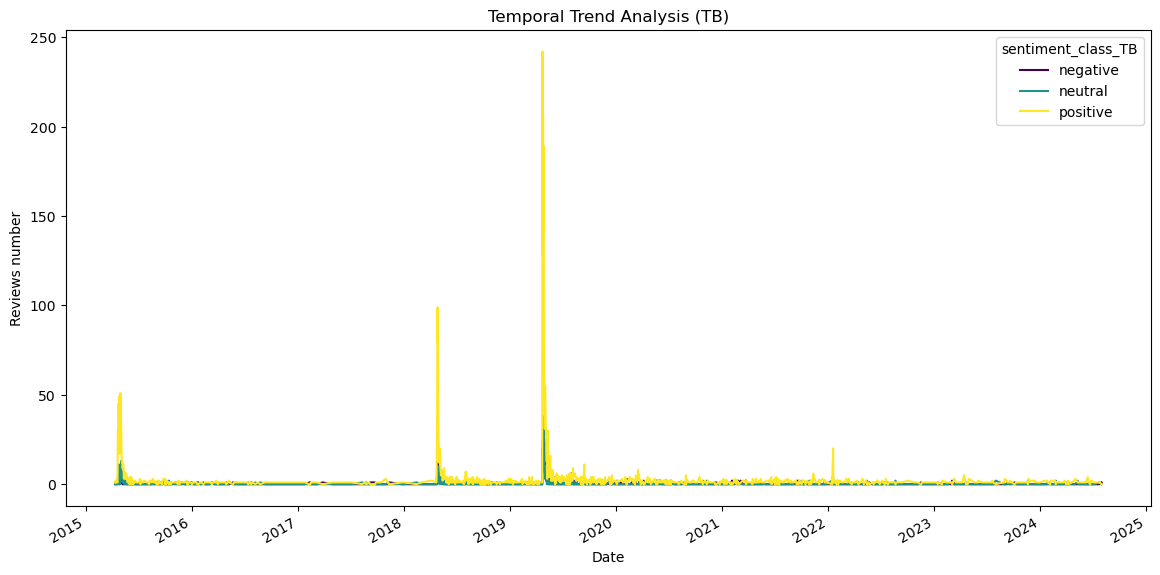

In [121]:
# Group by year and month. TextBlob sentiment
sentiment_trends = Avengers_reviews.groupby(['date', 'sentiment_class_TB']).size().unstack().fillna(0)

# Graph
sentiment_trends.plot(kind='line', figsize=(14, 7), colormap='viridis')
plt.title('Temporal Trend Analysis (TB)')
plt.xlabel('Date')
plt.ylabel('Reviews number')
plt.show()

In [122]:
# Save the clean datasets on CSV
combined_datasets_sentiment= Avengers_reviews.to_csv("combined_datasets_sentiment.csv", index=False)
combined_datasets_sentiment